Este proyecto tiene como objetivo demostrar técnicas básicas de procesamiento de imágenes utilizando OpenCV y otras librerías comunes en Python. Se exploran operaciones fundamentales como lectura, visualización, conversión de colores, detección de bordes, transformaciones geométricas y filtrado.

## 📚 Importación de librerías

Se importan las librerías necesarias para trabajar con imágenes, manipular matrices y visualizar resultados.

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import PIL

## 📥 Carga de la imagen y procesamiento inicial

Cargamos la imagen desde el disco y la mostramos en pantalla utilizando matplotlib. Es necesario convertirla de formato BGR a RGB para que los colores se visualicen correctamente.

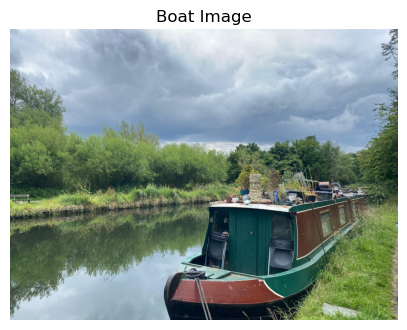

In [9]:
# Load the image
image = cv2.imread('imagenes/boat.jpeg')

# Plot image
plt.figure(figsize=(5, 5)) # Set figure size
plt.axis('off')  # Hide axes
plt.title('Boat Image')  # Set title

# Convert BGR to RGB for correct color representation
plt.imshow(image[:,:, ::-1])  

plt.show()

## 🧐 Información básica de la imagen

Analizamos las dimensiones de la imagen para conocer su resolución y número de canales de color.

In [10]:
image_shape = image.shape
max_value = np.max(image)
min_value = np.min(image)
unique_values = np.unique(image)

print(f"Image shape: {image_shape}")
print(f"Max value: {max_value}")
print(f"Min value: {min_value}")
print(f"Unique values: {len(unique_values)}")

Image shape: (3024, 4032, 3)
Max value: 255
Min value: 0
Unique values: 256


## 🎨 Canales de color \n\nExploramos cómo se representan los colores en las diferentes bandas (R, G, B) de la imagen.


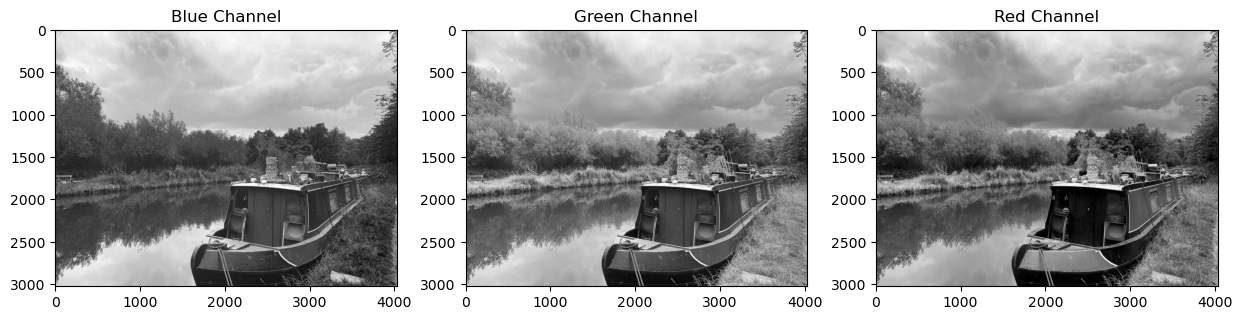

In [11]:
B = image[:, :, 0]
G = image[:, :, 1]
R = image[:, :, 2]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(B, 'gray')
axes[0].set_title('Blue Channel')
axes[1].imshow(G, 'gray')
axes[1].set_title('Green Channel')
axes[2].imshow(R, 'gray')
axes[2].set_title('Red Channel')

plt.show()

## 📊 Histogramas \n\nAnalizamos la distribución de intensidades para cada canal de color.


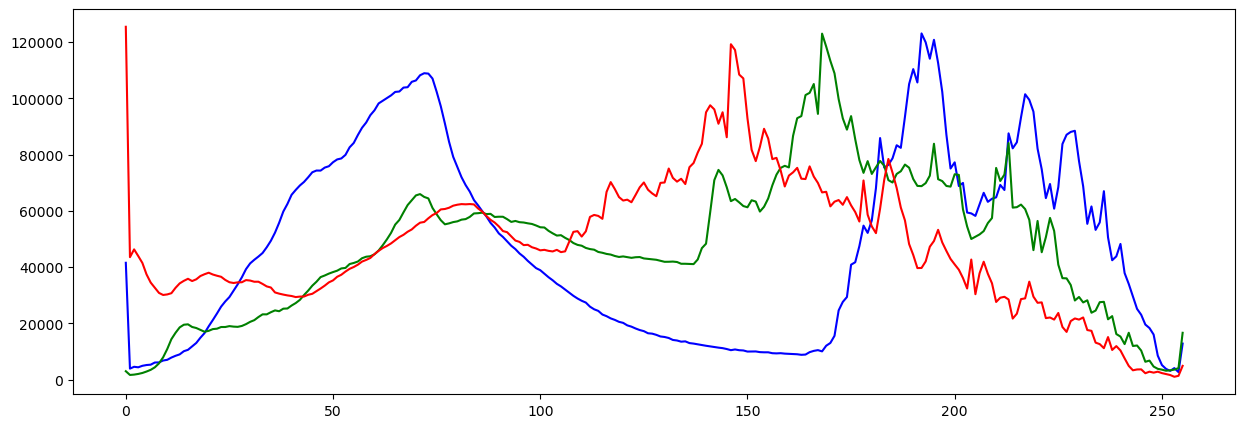

In [12]:
rows, cols = image.shape[:2]
hist = np.zeros(256)

# for j in range(rows):
#     for i in range(cols):
#       value = image[j, i]
#       hist[value] += 1

histB = cv2.calcHist([image], [0], None, [256], [0, 256])
histG = cv2.calcHist([image], [1], None, [256], [0, 256])
histR = cv2.calcHist([image], [2], None, [256], [0, 256])

plt.figure(figsize=(15, 5))
plt.plot(histB, color='b', label='Blue Channel')
plt.plot(histG, color='g', label='Green Channel')
plt.plot(histR, color='r', label='Red Channel')
plt.show()

## 📏 Tamaño de la imagen \n\nRevisamos las dimensiones y el número total de píxeles.


In [13]:
# image = image[:, :, ::-1]  # Convert BGR to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Different method to convert BGR to RGB

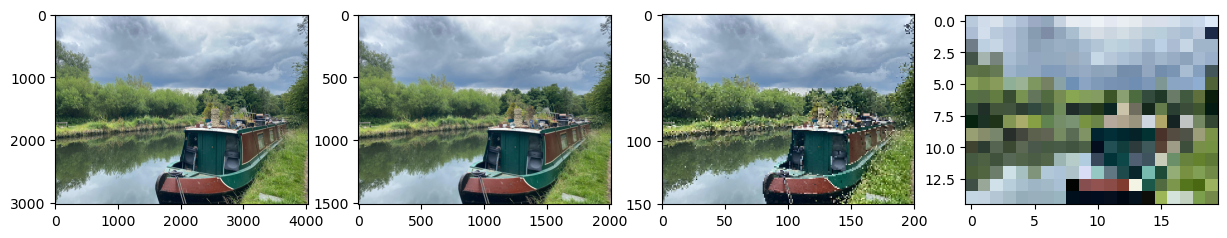

In [14]:
sizes_array = np.array([0.5, 0.05, 0.005])

fig, axes = plt.subplots(1, len(sizes_array)+1, figsize=(15, 5))
for i, sz in enumerate(sizes_array):
    resized_image = cv2.resize(
        image,
        dsize = (
            int(image.shape[1] * sz),
            int(image.shape[0] * sz)
        )
    )
    axes[i+1].imshow(resized_image)
axes[0].imshow(image)
plt.show() 

## 🌓 Conversión a blanco y negro \n\nConvertimos la imagen para analizarla sin información de color.


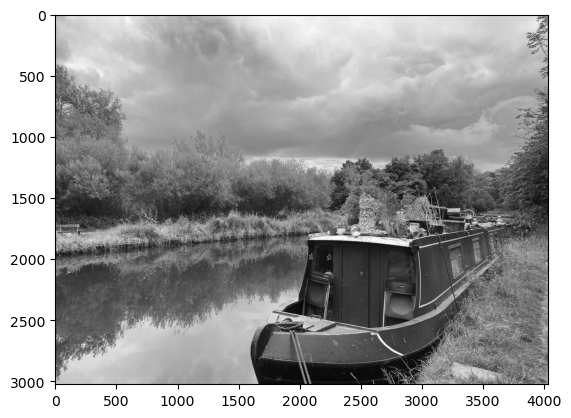

In [15]:
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

plt.imshow(gray_image, cmap='gray')
plt.show()

## 🌗 Conversión a escala de grises \n\nReducimos la imagen a tonos de gris para simplificar el procesamiento.


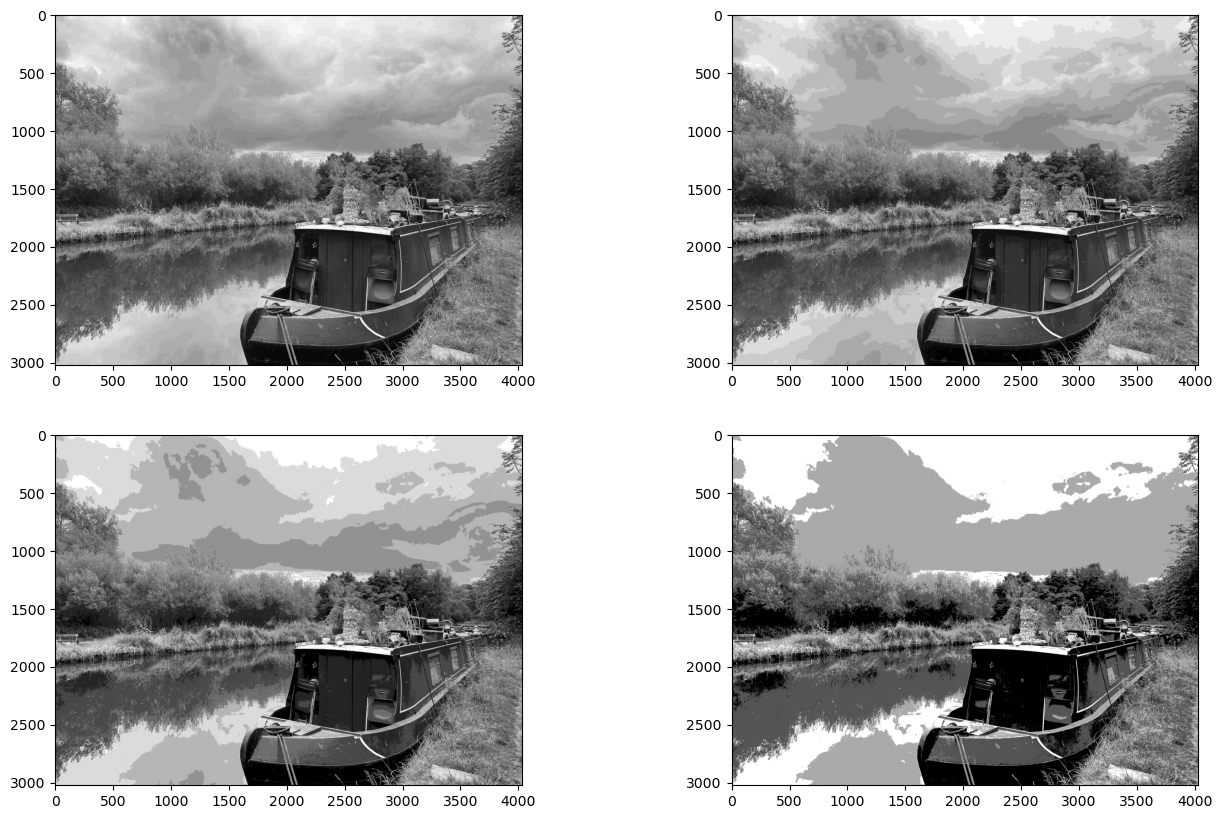

In [16]:
def gray_levels(n, image):
   step = 256 // n # al tener las dos barras no pone decimales
   reduced = (image // step) * step
   return reduced.astype(np.uint8) # convert to uint8

img32 = gray_levels(32, gray_image)
img16 = gray_levels(16, gray_image)
img8 = gray_levels(8, gray_image)
img4 = gray_levels(4, gray_image)

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes[0, 0].imshow(img32, 'gray')
axes[0, 1].imshow(img16, 'gray')
axes[1, 0].imshow(img8, 'gray')
axes[1, 1].imshow(img4, 'gray')
plt.show()

## 🎨 Dithering \n\nTécnica para simular tonos mediante patrones de puntos aleatorios.


In [17]:
gray_image_dw = cv2.resize(
    gray_image,
    dsize = (
        int(gray_image.shape[1] * 0.2),
        int(gray_image.shape[0] * 0.2)
    )       
)

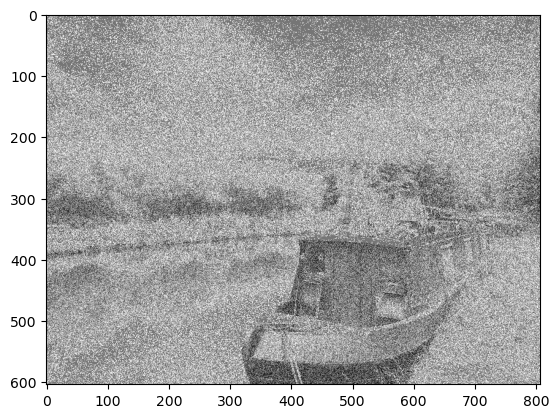

In [18]:
def white_noise_dithering(image, Fmax=255):
    image = image.astype(np.float32) # Convert to float for calculations
    noise = np.random.rand(*image.shape) * Fmax # Generate random noise [0, Fmax]
    noisy_image = image + noise # Add noise to the image
    dithered = np.where(noisy_image >= 255, 120, noisy_image).astype(np.uint8) # Clip values to [120, 255]
    
    return dithered

wn_image = white_noise_dithering(gray_image_dw, 150)
plt.figure()
plt.imshow(wn_image, cmap='gray')
plt.show()


## 🔧 Expansión del rango dinámico y transformación logarítmica \n\nExpandimos zonas oscuras y comprimimos zonas brillantes.


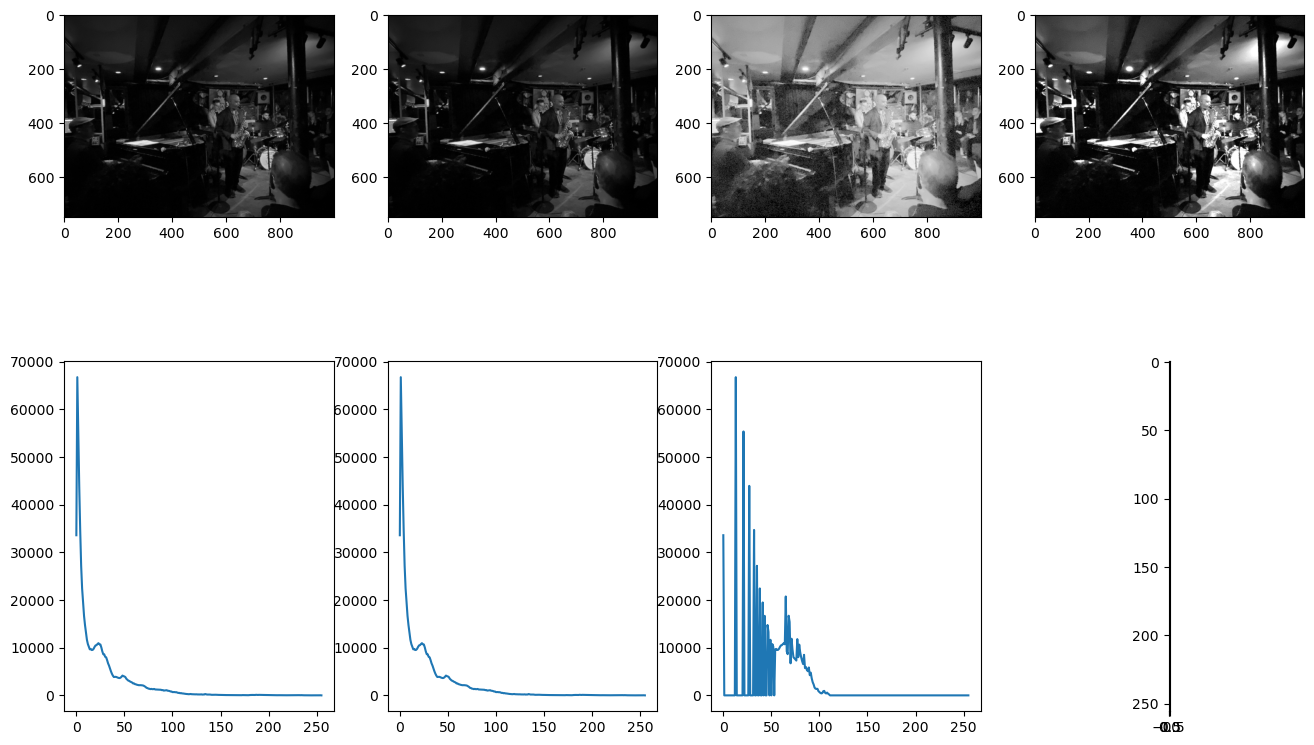

In [19]:
img = cv2.imread('imagenes/jazz.jpeg')

new_x = 1000
img = cv2.resize(
    img,
    dsize = (
        new_x,
        int(image.shape[0] * new_x / image.shape[1])
    )
)

gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

def dynamic_range (img):
    img = img.astype(np.float32)
    return ((img - np.min(img)) / (np.max(img) - np.min(img)) * 255).astype(np.uint8)

def log_transform(img, c=255.0 / np.log(256)):
    img_min, img_max = np.min(img), np.max(img)
    streched = ((img.astype(np.float32) - img_min) / (img_max - img_min + 1e-6))
    
    log_img = c * np.log(1.0 + 255.0 * streched)
    return log_img.astype(np.uint8)

def clip_and_expand(img, min_val, max_val):
    img[img < min_val] = min_val
    img[img > max_val] = max_val
    img = (img - min_val) / (max_val - min_val) * 255
    return img.astype(np.uint8)

expanded_image = dynamic_range(gray_image)
log_image = log_transform(gray_image, 20)
clip_image = clip_and_expand(gray_image.copy(), 0, 100)

# Compute histograms
hist_gray = cv2.calcHist([gray_image], [0], None, [256], [0, 256])
hist_expanded = cv2.calcHist([expanded_image], [0], None, [256], [0, 256])
hist_log = cv2.calcHist([log_image], [0], None, [256], [0, 256])
hist_clip = cv2.calcHist([clip_image], [0], None, [256], [0, 256])

# Plot histograms
fig, axes = plt.subplots(2, 4, figsize=(16, 10))
axes[0,0].imshow(gray_image, cmap='gray')
axes[0,1].imshow(expanded_image, cmap='gray')
axes[0,2].imshow(log_image, cmap='gray')
axes[0,3].imshow(clip_image, cmap='gray')
axes[1,0].plot(hist_gray)
axes[1,1].plot(hist_expanded)
axes[1,2].plot(hist_log)
axes[1,3].imshow(hist_clip)

plt.show()

## 🎨 Conversión de espacios de color \n\nTransformamos entre diferentes espacios como RGB, HSV, etc.


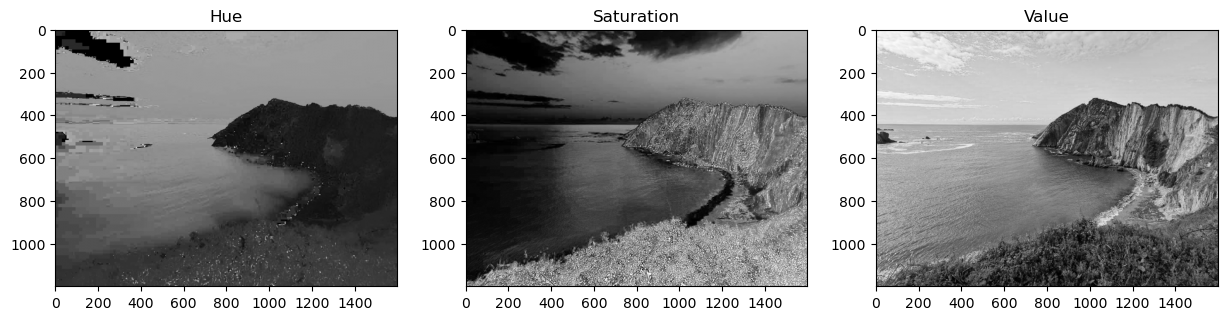

In [20]:
image = cv2.imread('imagenes/coast.jpeg')

hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(hsv)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(h, 'gray')
axes[0].set_title('Hue')
axes[1].imshow(s, 'gray')
axes[1].set_title('Saturation')
axes[2].imshow(v, 'gray')
axes[2].set_title('Value')
plt.show()

## 🎯 Umbralización (Thresholding) \n\nConvertimos la imagen en binaria según un valor límite.


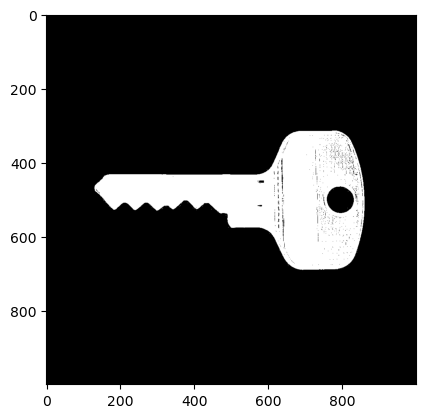

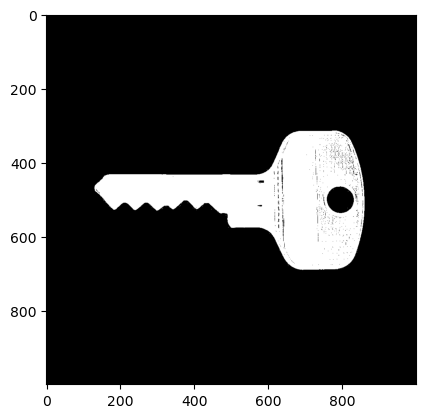

In [21]:
image = cv2.imread('imagenes/key_template.png')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Tresholding
_, binary = cv2.threshold(gray_image, 250, 255, cv2.THRESH_BINARY_INV) # Inverted binary thresholding
plt.imshow(binary, 'gray')
plt.show()

# second method
binary2 = np.zeros_like(gray_image)
binary2[gray_image <= 250] = 255
plt.figure()
plt.imshow(binary2, 'gray')
plt.show()

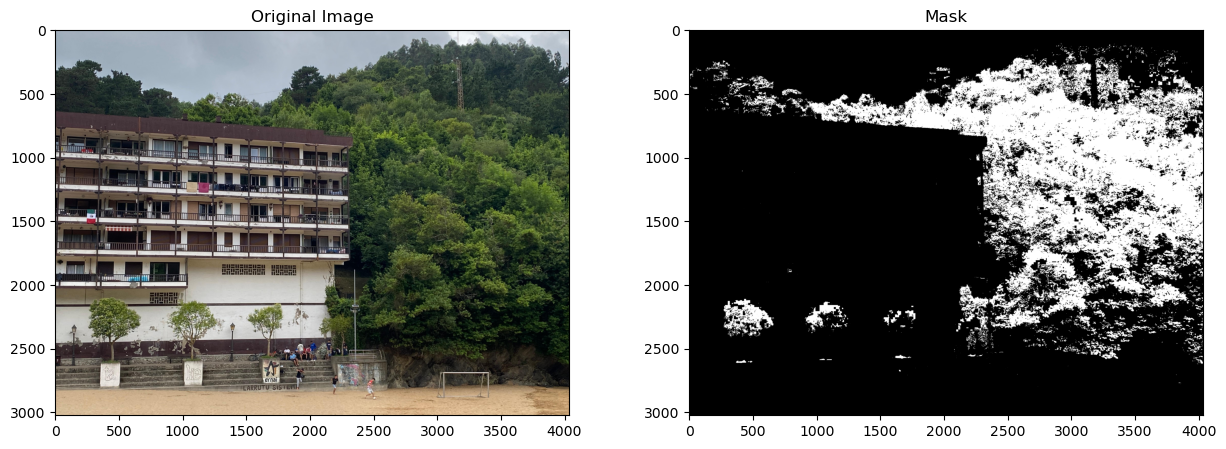

In [22]:
image = cv2.imread('imagenes/trees.jpeg')
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define green range HSV
lower_range = np.array([35, 50, 50])
upper_range = np.array([80, 255, 255])

# Create mask
mask = cv2.inRange(hsv, lower_range, upper_range)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes[0].imshow(image[:, :, ::-1]) # Convert BGR to RGB
axes[0].set_title('Original Image')
axes[1].imshow(mask, 'gray')
axes[1].set_title('Mask')
plt.show()

## 🧹 Operaciones morfológicas \n\nAplicamos técnicas como erosión y dilatación para modificar la forma de los objetos.


[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]


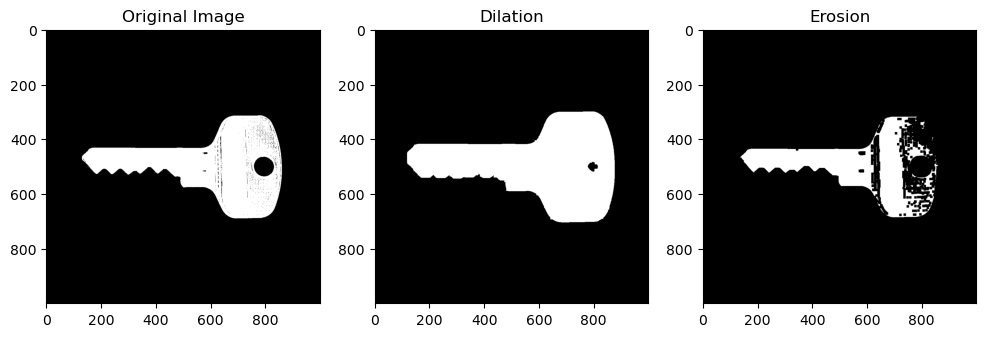

In [23]:
image = cv2.imread('imagenes/key_template.png')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, binary = cv2.threshold(gray_image, 250, 255, cv2.THRESH_BINARY_INV) # Inverted binary thresholding

kernel = np.ones((5, 5), dtype=np.uint8) # Structuring element
print(kernel)

eroded = cv2.erode(binary, kernel, iterations=2) # Erosion twice
dilated = cv2.dilate(binary, kernel, iterations=7) # Dilation seven times

fig, axes = plt.subplots(1, 3, figsize=(12, 6))
axes[0].imshow(binary, 'gray')
axes[0].set_title('Original Image')
axes[1].imshow(dilated, 'gray')
axes[1].set_title('Dilation')
axes[2].imshow(eroded, 'gray')
axes[2].set_title('Erosion')
plt.show()

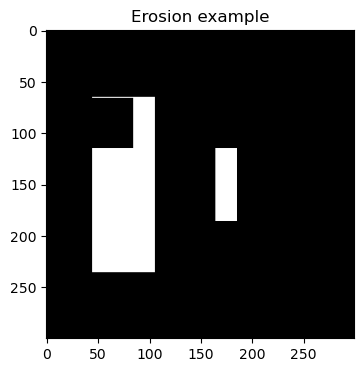

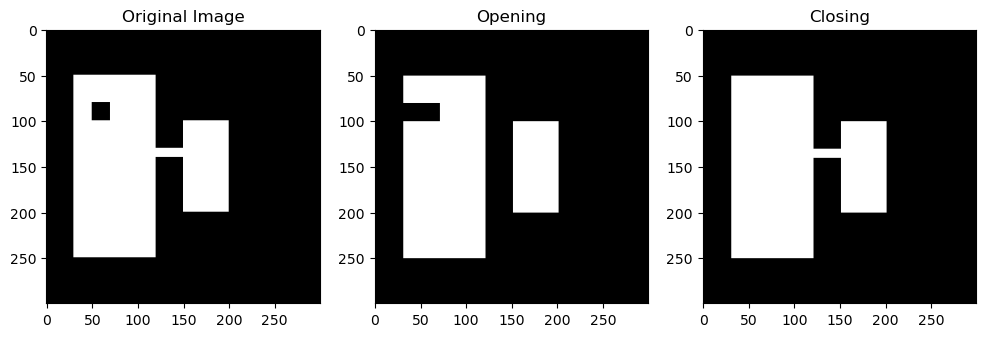

In [24]:
# Generate a synthetic image
image = np.zeros((300, 300), dtype=np.uint8)
image[50:250, 30:120] = 1
image[100:200, 150:200] = 1
image[130:140, 100:200] = 1
image[80:100, 50:70] = 0

# Morphological operations
kernel = np.ones((30, 30), dtype=np.uint8) # Structuring element
# Opening --> erosion followed by dilation
opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
# Closing --> dilation followed by erosion
closing = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)

# Erosion example
eroded = cv2.erode(image, kernel, iterations=1) # Erosion
plt.figure(figsize=(8, 4))
plt.title('Erosion example')
plt.imshow(eroded, 'gray')
plt.show()

fig, axes = plt.subplots(1, 3, figsize=(12, 6))
axes[0].imshow(image, 'gray')
axes[0].set_title('Original Image')
axes[1].imshow(opening, 'gray')
axes[1].set_title('Opening')
axes[2].imshow(closing, 'gray')
axes[2].set_title('Closing')
plt.show()


## 🔎 Detección de contornos \n\nIdentificamos los bordes de los objetos en la imagen.


In [25]:
colors = [
    (255, 0, 0),
    (0, 255, 0),
    (0, 0, 255),
]

296
576


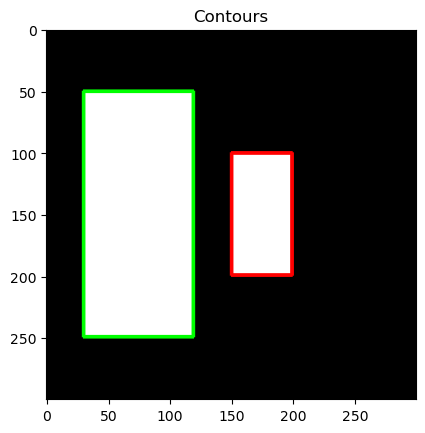

In [26]:
# Generate a synthetic image
image = np.zeros((300, 300), dtype=np.uint8)
image[50:250, 30:120] = 1
image[100:200, 150:200] = 1

# Image to RGB
image_rgb = np.repeat(image[:, :, None], 3, axis=2) * 255

# Find contours
contours, _ = cv2.findContours(image, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

for i, cont in enumerate(contours):
   print(len(cont))
   cv2.drawContours(image_rgb, cont, -1, colors[i%len(colors)], 2) # Draw contours

plt.imshow(image_rgb)
plt.title('Contours')
plt.show()

## 🎨 Ejercicio 1: Segmentación por color


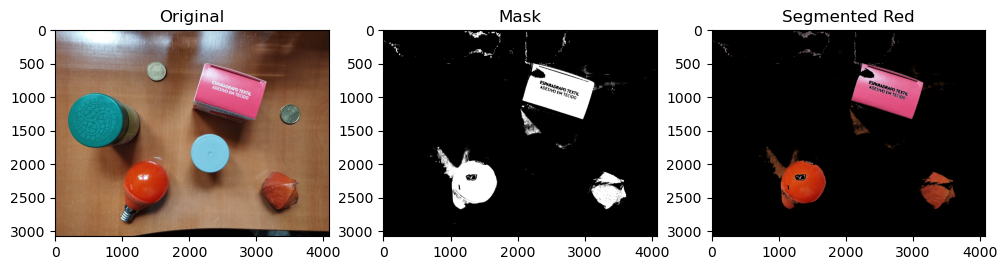

In [27]:
# Load image
image = cv2.imread('imagenes/redobjects.jpeg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define red color range (in HSV) -> Luz y Flor
lower_red = np.array([0, 170, 100])
upper_red = np.array([10, 255, 255])
mask = cv2.inRange(hsv, lower_red, upper_red)

# Define custom color range -> Caja esparadrapo
lower_red = np.array([150, 30, 100])
upper_red = np.array([190, 255, 255])
mask2 = cv2.inRange(hsv, lower_red, upper_red)

# Join masks (OR)
mask = cv2.bitwise_or(mask, mask2)

# Apply mask (AND)
segmented = cv2.bitwise_and(image_rgb, image_rgb, mask=mask)

# Plot
plt.figure(figsize=(12, 4))
plt.subplot(131); plt.imshow(image_rgb); plt.title('Original')
plt.subplot(132); plt.imshow(mask, 'gray'); plt.title('Mask')
plt.subplot(133); plt.imshow(segmented); plt.title('Segmented Red')
plt.show()

## 🧮 Ejercicio 2: Conteo de objetos en la imagen


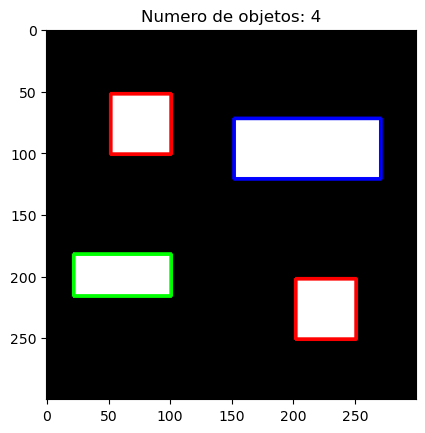

In [35]:
image = np.zeros((300, 300), dtype=np.uint8)
image[50:100, 50:100] = 1
image[200:250, 200:250] = 1
image[180:215, 20:100] = 1
image[70:120, 150:200] = 1
image[70:120, 200:270] = 1

image[90:100, 200:220] = 1
image[70:75, 70:75] = 0

# Opening then Closing
# Distintos tamanos de KERNEL
kernel = np.ones((10, 10), np.uint8)
image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
kernel = np.ones((20, 20), np.uint8)
image = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

image_rgb = np.repeat(image[:, :, None], 3, axis=2)*255

contours, _ = cv2.findContours(image, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
# contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

for i, cont in enumerate(contours):
    cv2.drawContours(image_rgb, cont, -1, colors[i%len(colors)], 2)

plt.imshow(image_rgb)
plt.title(f'Numero de objetos: {len(contours)}')
plt.show()

## ✅ Conclusiones

Este proyecto cubre las bases del procesamiento de imágenes en Python con OpenCV. Las técnicas implementadas son fundamentales para tareas más complejas como visión por computadora y aprendizaje automático.

En futuras versiones se podrían explorar:
- Segmentación avanzada
- Reconocimiento de objetos
- Clasificación de imágenes con redes neuronales